# Convolutional Autoencoder

In [11]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [12]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


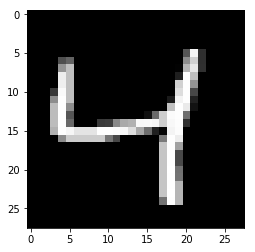

In [13]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

In [19]:
learning_rate = 0.001

# Input and target placeholders
inputs_ = tf.placeholder(tf.float32, (None, 28, 28, 1), name='inputs')
targets_ = tf.placeholder(tf.float32, (None, 28, 28, 1), name='targets')

### Encoder
conv1 = tf.layers.conv2d(inputs_, 16, (3, 3), padding='same', activation=tf.nn.relu)
# Now 28x28x16
maxpool1 = tf.layers.max_pooling2d(conv1, (2, 2), (2, 2), padding='same')
# Now 14x14x16
conv2 = tf.layers.conv2d(maxpool1, 8, (3, 3), padding='same', activation=tf.nn.relu)
# Now 14x14x8
maxpool2 = tf.layers.max_pooling2d(conv2, (2, 2), (2, 2), padding='same')
# Now 7x7x8
conv3 = tf.layers.conv2d(maxpool2, 8, (3, 3), padding='same', activation=tf.nn.relu)
# Now 7x7x8
encoded = tf.layers.max_pooling2d(conv3, (2, 2), (2, 2), padding='same')
# Now 4x4x8

### Decoder
upsample1 = tf.image.resize_nearest_neighbor(encoded, (7, 7))
# Now 7x7x8
conv4 = tf.layers.conv2d(upsample1, 8, (3, 3), padding='same', activation=tf.nn.relu)
# Now 7x7x8
upsample2 = tf.image.resize_nearest_neighbor(conv4, (14, 14))
# Now 14x14x8
conv5 = tf.layers.conv2d(upsample2, 8, (3, 3), padding='same', activation=tf.nn.relu)
# Now 14x14x8
upsample3 = tf.image.resize_nearest_neighbor(conv5, (28, 28))
# Now 28x28x8
conv6 = tf.layers.conv2d(upsample3, 16, (3, 3), padding='same', activation=tf.nn.relu)
# Now 28x28x16

logits = tf.layers.conv2d(conv6, 1, (3, 3), padding='same', activation=None)
#Now 28x28x1

# Pass logits through sigmoid to get reconstructed image
decoded = tf.nn.sigmoid(logits)

# Pass logits through sigmoid and calculate the cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)

# Get cost and define the optimizer
cost = tf.reduce_mean(loss)
opt = tf.train.AdamOptimizer(learning_rate).minimize(cost)

## Training

In [20]:
sess = tf.Session()

In [21]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        imgs = batch[0].reshape((-1, 28, 28, 1))
        batch_cost, _ = sess.run([cost, opt], feed_dict={inputs_: imgs,
                                                         targets_: imgs})

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6919
Epoch: 1/20... Training loss: 0.6893
Epoch: 1/20... Training loss: 0.6861
Epoch: 1/20... Training loss: 0.6823
Epoch: 1/20... Training loss: 0.6775
Epoch: 1/20... Training loss: 0.6716
Epoch: 1/20... Training loss: 0.6646
Epoch: 1/20... Training loss: 0.6559
Epoch: 1/20... Training loss: 0.6460
Epoch: 1/20... Training loss: 0.6331
Epoch: 1/20... Training loss: 0.6184
Epoch: 1/20... Training loss: 0.6028
Epoch: 1/20... Training loss: 0.5852
Epoch: 1/20... Training loss: 0.5658
Epoch: 1/20... Training loss: 0.5419
Epoch: 1/20... Training loss: 0.5282
Epoch: 1/20... Training loss: 0.5156
Epoch: 1/20... Training loss: 0.5022
Epoch: 1/20... Training loss: 0.5107
Epoch: 1/20... Training loss: 0.5302
Epoch: 1/20... Training loss: 0.5235
Epoch: 1/20... Training loss: 0.5138
Epoch: 1/20... Training loss: 0.4932
Epoch: 1/20... Training loss: 0.4914
Epoch: 1/20... Training loss: 0.4806
Epoch: 1/20... Training loss: 0.4724
Epoch: 1/20... Training loss: 0.4629
E

Epoch: 1/20... Training loss: 0.1714
Epoch: 1/20... Training loss: 0.1678
Epoch: 1/20... Training loss: 0.1699
Epoch: 1/20... Training loss: 0.1645
Epoch: 1/20... Training loss: 0.1686
Epoch: 1/20... Training loss: 0.1676
Epoch: 1/20... Training loss: 0.1689
Epoch: 1/20... Training loss: 0.1631
Epoch: 1/20... Training loss: 0.1672
Epoch: 1/20... Training loss: 0.1603
Epoch: 1/20... Training loss: 0.1701
Epoch: 1/20... Training loss: 0.1648
Epoch: 1/20... Training loss: 0.1662
Epoch: 1/20... Training loss: 0.1636
Epoch: 1/20... Training loss: 0.1639
Epoch: 1/20... Training loss: 0.1626
Epoch: 1/20... Training loss: 0.1625
Epoch: 1/20... Training loss: 0.1686
Epoch: 1/20... Training loss: 0.1605
Epoch: 1/20... Training loss: 0.1610
Epoch: 1/20... Training loss: 0.1614
Epoch: 1/20... Training loss: 0.1685
Epoch: 1/20... Training loss: 0.1638
Epoch: 1/20... Training loss: 0.1625
Epoch: 1/20... Training loss: 0.1592
Epoch: 1/20... Training loss: 0.1648
Epoch: 1/20... Training loss: 0.1624
E

Epoch: 2/20... Training loss: 0.1364
Epoch: 2/20... Training loss: 0.1395
Epoch: 2/20... Training loss: 0.1443
Epoch: 2/20... Training loss: 0.1434
Epoch: 2/20... Training loss: 0.1407
Epoch: 2/20... Training loss: 0.1494
Epoch: 2/20... Training loss: 0.1428
Epoch: 2/20... Training loss: 0.1412
Epoch: 2/20... Training loss: 0.1456
Epoch: 2/20... Training loss: 0.1401
Epoch: 2/20... Training loss: 0.1416
Epoch: 2/20... Training loss: 0.1343
Epoch: 2/20... Training loss: 0.1383
Epoch: 2/20... Training loss: 0.1435
Epoch: 2/20... Training loss: 0.1403
Epoch: 2/20... Training loss: 0.1458
Epoch: 2/20... Training loss: 0.1405
Epoch: 2/20... Training loss: 0.1381
Epoch: 2/20... Training loss: 0.1420
Epoch: 2/20... Training loss: 0.1341
Epoch: 2/20... Training loss: 0.1428
Epoch: 2/20... Training loss: 0.1428
Epoch: 2/20... Training loss: 0.1402
Epoch: 2/20... Training loss: 0.1404
Epoch: 2/20... Training loss: 0.1376
Epoch: 2/20... Training loss: 0.1349
Epoch: 2/20... Training loss: 0.1388
E

Epoch: 3/20... Training loss: 0.1280
Epoch: 3/20... Training loss: 0.1289
Epoch: 3/20... Training loss: 0.1269
Epoch: 3/20... Training loss: 0.1338
Epoch: 3/20... Training loss: 0.1336
Epoch: 3/20... Training loss: 0.1319
Epoch: 3/20... Training loss: 0.1313
Epoch: 3/20... Training loss: 0.1287
Epoch: 3/20... Training loss: 0.1306
Epoch: 3/20... Training loss: 0.1317
Epoch: 3/20... Training loss: 0.1298
Epoch: 3/20... Training loss: 0.1306
Epoch: 3/20... Training loss: 0.1310
Epoch: 3/20... Training loss: 0.1307
Epoch: 3/20... Training loss: 0.1328
Epoch: 3/20... Training loss: 0.1237
Epoch: 3/20... Training loss: 0.1322
Epoch: 3/20... Training loss: 0.1292
Epoch: 3/20... Training loss: 0.1290
Epoch: 3/20... Training loss: 0.1310
Epoch: 3/20... Training loss: 0.1260
Epoch: 3/20... Training loss: 0.1318
Epoch: 3/20... Training loss: 0.1333
Epoch: 3/20... Training loss: 0.1318
Epoch: 3/20... Training loss: 0.1290
Epoch: 3/20... Training loss: 0.1320
Epoch: 3/20... Training loss: 0.1296
E

Epoch: 3/20... Training loss: 0.1177
Epoch: 3/20... Training loss: 0.1221
Epoch: 3/20... Training loss: 0.1229
Epoch: 3/20... Training loss: 0.1201
Epoch: 3/20... Training loss: 0.1223
Epoch: 3/20... Training loss: 0.1209
Epoch: 3/20... Training loss: 0.1195
Epoch: 3/20... Training loss: 0.1179
Epoch: 3/20... Training loss: 0.1209
Epoch: 3/20... Training loss: 0.1212
Epoch: 3/20... Training loss: 0.1227
Epoch: 3/20... Training loss: 0.1187
Epoch: 4/20... Training loss: 0.1151
Epoch: 4/20... Training loss: 0.1137
Epoch: 4/20... Training loss: 0.1196
Epoch: 4/20... Training loss: 0.1240
Epoch: 4/20... Training loss: 0.1211
Epoch: 4/20... Training loss: 0.1205
Epoch: 4/20... Training loss: 0.1228
Epoch: 4/20... Training loss: 0.1193
Epoch: 4/20... Training loss: 0.1181
Epoch: 4/20... Training loss: 0.1177
Epoch: 4/20... Training loss: 0.1219
Epoch: 4/20... Training loss: 0.1221
Epoch: 4/20... Training loss: 0.1201
Epoch: 4/20... Training loss: 0.1190
Epoch: 4/20... Training loss: 0.1180
E

Epoch: 4/20... Training loss: 0.1120
Epoch: 4/20... Training loss: 0.1126
Epoch: 4/20... Training loss: 0.1114
Epoch: 4/20... Training loss: 0.1153
Epoch: 4/20... Training loss: 0.1112
Epoch: 4/20... Training loss: 0.1135
Epoch: 4/20... Training loss: 0.1193
Epoch: 4/20... Training loss: 0.1107
Epoch: 4/20... Training loss: 0.1160
Epoch: 4/20... Training loss: 0.1152
Epoch: 4/20... Training loss: 0.1127
Epoch: 4/20... Training loss: 0.1152
Epoch: 4/20... Training loss: 0.1187
Epoch: 4/20... Training loss: 0.1151
Epoch: 4/20... Training loss: 0.1135
Epoch: 4/20... Training loss: 0.1153
Epoch: 4/20... Training loss: 0.1163
Epoch: 4/20... Training loss: 0.1188
Epoch: 4/20... Training loss: 0.1145
Epoch: 4/20... Training loss: 0.1168
Epoch: 4/20... Training loss: 0.1124
Epoch: 4/20... Training loss: 0.1127
Epoch: 4/20... Training loss: 0.1166
Epoch: 4/20... Training loss: 0.1158
Epoch: 4/20... Training loss: 0.1118
Epoch: 4/20... Training loss: 0.1176
Epoch: 4/20... Training loss: 0.1158
E

Epoch: 5/20... Training loss: 0.1158
Epoch: 5/20... Training loss: 0.1141
Epoch: 5/20... Training loss: 0.1083
Epoch: 5/20... Training loss: 0.1132
Epoch: 5/20... Training loss: 0.1122
Epoch: 5/20... Training loss: 0.1141
Epoch: 5/20... Training loss: 0.1127
Epoch: 5/20... Training loss: 0.1110
Epoch: 5/20... Training loss: 0.1114
Epoch: 5/20... Training loss: 0.1098
Epoch: 5/20... Training loss: 0.1126
Epoch: 5/20... Training loss: 0.1092
Epoch: 5/20... Training loss: 0.1101
Epoch: 5/20... Training loss: 0.1093
Epoch: 5/20... Training loss: 0.1076
Epoch: 5/20... Training loss: 0.1123
Epoch: 5/20... Training loss: 0.1090
Epoch: 5/20... Training loss: 0.1137
Epoch: 5/20... Training loss: 0.1132
Epoch: 5/20... Training loss: 0.1155
Epoch: 5/20... Training loss: 0.1101
Epoch: 5/20... Training loss: 0.1127
Epoch: 5/20... Training loss: 0.1113
Epoch: 5/20... Training loss: 0.1129
Epoch: 5/20... Training loss: 0.1126
Epoch: 5/20... Training loss: 0.1125
Epoch: 5/20... Training loss: 0.1103
E

Epoch: 6/20... Training loss: 0.1107
Epoch: 6/20... Training loss: 0.1075
Epoch: 6/20... Training loss: 0.1116
Epoch: 6/20... Training loss: 0.1091
Epoch: 6/20... Training loss: 0.1116
Epoch: 6/20... Training loss: 0.1097
Epoch: 6/20... Training loss: 0.1106
Epoch: 6/20... Training loss: 0.1092
Epoch: 6/20... Training loss: 0.1049
Epoch: 6/20... Training loss: 0.1084
Epoch: 6/20... Training loss: 0.1085
Epoch: 6/20... Training loss: 0.1134
Epoch: 6/20... Training loss: 0.1107
Epoch: 6/20... Training loss: 0.1134
Epoch: 6/20... Training loss: 0.1050
Epoch: 6/20... Training loss: 0.1090
Epoch: 6/20... Training loss: 0.1135
Epoch: 6/20... Training loss: 0.1065
Epoch: 6/20... Training loss: 0.1122
Epoch: 6/20... Training loss: 0.1056
Epoch: 6/20... Training loss: 0.1073
Epoch: 6/20... Training loss: 0.1106
Epoch: 6/20... Training loss: 0.1059
Epoch: 6/20... Training loss: 0.1077
Epoch: 6/20... Training loss: 0.1127
Epoch: 6/20... Training loss: 0.1067
Epoch: 6/20... Training loss: 0.1123
E

Epoch: 6/20... Training loss: 0.1075
Epoch: 6/20... Training loss: 0.1072
Epoch: 6/20... Training loss: 0.1087
Epoch: 6/20... Training loss: 0.1082
Epoch: 6/20... Training loss: 0.1111
Epoch: 6/20... Training loss: 0.1079
Epoch: 6/20... Training loss: 0.1068
Epoch: 6/20... Training loss: 0.1032
Epoch: 6/20... Training loss: 0.1101
Epoch: 6/20... Training loss: 0.1054
Epoch: 6/20... Training loss: 0.1106
Epoch: 6/20... Training loss: 0.1097
Epoch: 6/20... Training loss: 0.1048
Epoch: 6/20... Training loss: 0.1037
Epoch: 6/20... Training loss: 0.1064
Epoch: 6/20... Training loss: 0.1063
Epoch: 6/20... Training loss: 0.1102
Epoch: 6/20... Training loss: 0.1065
Epoch: 6/20... Training loss: 0.1088
Epoch: 6/20... Training loss: 0.1064
Epoch: 6/20... Training loss: 0.1089
Epoch: 6/20... Training loss: 0.1112
Epoch: 6/20... Training loss: 0.1075
Epoch: 6/20... Training loss: 0.1062
Epoch: 7/20... Training loss: 0.1068
Epoch: 7/20... Training loss: 0.1081
Epoch: 7/20... Training loss: 0.1054
E

Epoch: 7/20... Training loss: 0.1072
Epoch: 7/20... Training loss: 0.1055
Epoch: 7/20... Training loss: 0.1076
Epoch: 7/20... Training loss: 0.1087
Epoch: 7/20... Training loss: 0.1063
Epoch: 7/20... Training loss: 0.1073
Epoch: 7/20... Training loss: 0.1048
Epoch: 7/20... Training loss: 0.1031
Epoch: 7/20... Training loss: 0.1056
Epoch: 7/20... Training loss: 0.1048
Epoch: 7/20... Training loss: 0.1047
Epoch: 7/20... Training loss: 0.1050
Epoch: 7/20... Training loss: 0.1069
Epoch: 7/20... Training loss: 0.1049
Epoch: 7/20... Training loss: 0.1041
Epoch: 7/20... Training loss: 0.1019
Epoch: 7/20... Training loss: 0.1033
Epoch: 7/20... Training loss: 0.1045
Epoch: 7/20... Training loss: 0.1061
Epoch: 7/20... Training loss: 0.1062
Epoch: 7/20... Training loss: 0.1092
Epoch: 7/20... Training loss: 0.1070
Epoch: 7/20... Training loss: 0.1098
Epoch: 7/20... Training loss: 0.1081
Epoch: 7/20... Training loss: 0.1105
Epoch: 7/20... Training loss: 0.1033
Epoch: 7/20... Training loss: 0.1051
E

Epoch: 8/20... Training loss: 0.1019
Epoch: 8/20... Training loss: 0.1055
Epoch: 8/20... Training loss: 0.1025
Epoch: 8/20... Training loss: 0.1025
Epoch: 8/20... Training loss: 0.1036
Epoch: 8/20... Training loss: 0.1011
Epoch: 8/20... Training loss: 0.1012
Epoch: 8/20... Training loss: 0.1073
Epoch: 8/20... Training loss: 0.1009
Epoch: 8/20... Training loss: 0.1083
Epoch: 8/20... Training loss: 0.1039
Epoch: 8/20... Training loss: 0.1043
Epoch: 8/20... Training loss: 0.1048
Epoch: 8/20... Training loss: 0.1038
Epoch: 8/20... Training loss: 0.1056
Epoch: 8/20... Training loss: 0.1113
Epoch: 8/20... Training loss: 0.1057
Epoch: 8/20... Training loss: 0.1023
Epoch: 8/20... Training loss: 0.1068
Epoch: 8/20... Training loss: 0.1063
Epoch: 8/20... Training loss: 0.1051
Epoch: 8/20... Training loss: 0.1032
Epoch: 8/20... Training loss: 0.1039
Epoch: 8/20... Training loss: 0.1075
Epoch: 8/20... Training loss: 0.1028
Epoch: 8/20... Training loss: 0.1053
Epoch: 8/20... Training loss: 0.1050
E

Epoch: 9/20... Training loss: 0.1017
Epoch: 9/20... Training loss: 0.1039
Epoch: 9/20... Training loss: 0.1046
Epoch: 9/20... Training loss: 0.1086
Epoch: 9/20... Training loss: 0.1037
Epoch: 9/20... Training loss: 0.1020
Epoch: 9/20... Training loss: 0.1008
Epoch: 9/20... Training loss: 0.1034
Epoch: 9/20... Training loss: 0.1034
Epoch: 9/20... Training loss: 0.1046
Epoch: 9/20... Training loss: 0.1061
Epoch: 9/20... Training loss: 0.1059
Epoch: 9/20... Training loss: 0.1088
Epoch: 9/20... Training loss: 0.1046
Epoch: 9/20... Training loss: 0.1022
Epoch: 9/20... Training loss: 0.1027
Epoch: 9/20... Training loss: 0.1046
Epoch: 9/20... Training loss: 0.1045
Epoch: 9/20... Training loss: 0.1056
Epoch: 9/20... Training loss: 0.1033
Epoch: 9/20... Training loss: 0.1032
Epoch: 9/20... Training loss: 0.1020
Epoch: 9/20... Training loss: 0.1066
Epoch: 9/20... Training loss: 0.0971
Epoch: 9/20... Training loss: 0.1050
Epoch: 9/20... Training loss: 0.1030
Epoch: 9/20... Training loss: 0.1040
E

Epoch: 9/20... Training loss: 0.1043
Epoch: 9/20... Training loss: 0.1048
Epoch: 9/20... Training loss: 0.1031
Epoch: 9/20... Training loss: 0.1029
Epoch: 9/20... Training loss: 0.1061
Epoch: 9/20... Training loss: 0.1002
Epoch: 9/20... Training loss: 0.1002
Epoch: 9/20... Training loss: 0.1056
Epoch: 9/20... Training loss: 0.1047
Epoch: 9/20... Training loss: 0.1003
Epoch: 9/20... Training loss: 0.1019
Epoch: 9/20... Training loss: 0.1007
Epoch: 9/20... Training loss: 0.1051
Epoch: 9/20... Training loss: 0.1026
Epoch: 9/20... Training loss: 0.1040
Epoch: 9/20... Training loss: 0.1044
Epoch: 9/20... Training loss: 0.1009
Epoch: 9/20... Training loss: 0.1036
Epoch: 9/20... Training loss: 0.1052
Epoch: 9/20... Training loss: 0.1034
Epoch: 9/20... Training loss: 0.1036
Epoch: 9/20... Training loss: 0.1010
Epoch: 9/20... Training loss: 0.1026
Epoch: 9/20... Training loss: 0.1047
Epoch: 9/20... Training loss: 0.1043
Epoch: 9/20... Training loss: 0.0998
Epoch: 9/20... Training loss: 0.1023
E

Epoch: 10/20... Training loss: 0.1035
Epoch: 10/20... Training loss: 0.1031
Epoch: 10/20... Training loss: 0.1037
Epoch: 10/20... Training loss: 0.1010
Epoch: 10/20... Training loss: 0.1005
Epoch: 10/20... Training loss: 0.1007
Epoch: 10/20... Training loss: 0.1029
Epoch: 10/20... Training loss: 0.1036
Epoch: 10/20... Training loss: 0.1018
Epoch: 10/20... Training loss: 0.1003
Epoch: 10/20... Training loss: 0.1040
Epoch: 10/20... Training loss: 0.1013
Epoch: 10/20... Training loss: 0.1037
Epoch: 10/20... Training loss: 0.1033
Epoch: 10/20... Training loss: 0.0969
Epoch: 10/20... Training loss: 0.1001
Epoch: 10/20... Training loss: 0.1054
Epoch: 10/20... Training loss: 0.1067
Epoch: 10/20... Training loss: 0.0961
Epoch: 10/20... Training loss: 0.1028
Epoch: 10/20... Training loss: 0.0996
Epoch: 10/20... Training loss: 0.1027
Epoch: 10/20... Training loss: 0.1014
Epoch: 10/20... Training loss: 0.0983
Epoch: 10/20... Training loss: 0.1022
Epoch: 10/20... Training loss: 0.1057
Epoch: 10/20

Epoch: 11/20... Training loss: 0.1013
Epoch: 11/20... Training loss: 0.0998
Epoch: 11/20... Training loss: 0.1014
Epoch: 11/20... Training loss: 0.0989
Epoch: 11/20... Training loss: 0.1000
Epoch: 11/20... Training loss: 0.0996
Epoch: 11/20... Training loss: 0.1017
Epoch: 11/20... Training loss: 0.1029
Epoch: 11/20... Training loss: 0.0985
Epoch: 11/20... Training loss: 0.1003
Epoch: 11/20... Training loss: 0.1047
Epoch: 11/20... Training loss: 0.1011
Epoch: 11/20... Training loss: 0.1012
Epoch: 11/20... Training loss: 0.1030
Epoch: 11/20... Training loss: 0.1016
Epoch: 11/20... Training loss: 0.1009
Epoch: 11/20... Training loss: 0.0987
Epoch: 11/20... Training loss: 0.0996
Epoch: 11/20... Training loss: 0.1055
Epoch: 11/20... Training loss: 0.1037
Epoch: 11/20... Training loss: 0.1000
Epoch: 11/20... Training loss: 0.1013
Epoch: 11/20... Training loss: 0.1003
Epoch: 11/20... Training loss: 0.1077
Epoch: 11/20... Training loss: 0.0994
Epoch: 11/20... Training loss: 0.1011
Epoch: 11/20

Epoch: 12/20... Training loss: 0.1031
Epoch: 12/20... Training loss: 0.1008
Epoch: 12/20... Training loss: 0.0986
Epoch: 12/20... Training loss: 0.0997
Epoch: 12/20... Training loss: 0.1007
Epoch: 12/20... Training loss: 0.1014
Epoch: 12/20... Training loss: 0.0995
Epoch: 12/20... Training loss: 0.0988
Epoch: 12/20... Training loss: 0.1018
Epoch: 12/20... Training loss: 0.0998
Epoch: 12/20... Training loss: 0.1021
Epoch: 12/20... Training loss: 0.1025
Epoch: 12/20... Training loss: 0.0999
Epoch: 12/20... Training loss: 0.1019
Epoch: 12/20... Training loss: 0.1023
Epoch: 12/20... Training loss: 0.1026
Epoch: 12/20... Training loss: 0.0978
Epoch: 12/20... Training loss: 0.1024
Epoch: 12/20... Training loss: 0.1018
Epoch: 12/20... Training loss: 0.1015
Epoch: 12/20... Training loss: 0.1050
Epoch: 12/20... Training loss: 0.0990
Epoch: 12/20... Training loss: 0.1021
Epoch: 12/20... Training loss: 0.0974
Epoch: 12/20... Training loss: 0.0995
Epoch: 12/20... Training loss: 0.0995
Epoch: 12/20

Epoch: 12/20... Training loss: 0.1047
Epoch: 12/20... Training loss: 0.1023
Epoch: 12/20... Training loss: 0.0977
Epoch: 12/20... Training loss: 0.0966
Epoch: 12/20... Training loss: 0.1010
Epoch: 12/20... Training loss: 0.1007
Epoch: 12/20... Training loss: 0.0996
Epoch: 12/20... Training loss: 0.0961
Epoch: 12/20... Training loss: 0.1037
Epoch: 12/20... Training loss: 0.1002
Epoch: 12/20... Training loss: 0.1017
Epoch: 12/20... Training loss: 0.0979
Epoch: 12/20... Training loss: 0.1026
Epoch: 12/20... Training loss: 0.1039
Epoch: 12/20... Training loss: 0.0997
Epoch: 12/20... Training loss: 0.1006
Epoch: 12/20... Training loss: 0.0985
Epoch: 12/20... Training loss: 0.1022
Epoch: 12/20... Training loss: 0.1004
Epoch: 12/20... Training loss: 0.1012
Epoch: 12/20... Training loss: 0.1001
Epoch: 12/20... Training loss: 0.1034
Epoch: 12/20... Training loss: 0.1025
Epoch: 12/20... Training loss: 0.1035
Epoch: 12/20... Training loss: 0.1024
Epoch: 12/20... Training loss: 0.0969
Epoch: 12/20

Epoch: 13/20... Training loss: 0.1020
Epoch: 13/20... Training loss: 0.1011
Epoch: 13/20... Training loss: 0.1021
Epoch: 13/20... Training loss: 0.1021
Epoch: 13/20... Training loss: 0.1013
Epoch: 13/20... Training loss: 0.0973
Epoch: 13/20... Training loss: 0.0993
Epoch: 13/20... Training loss: 0.1003
Epoch: 13/20... Training loss: 0.1016
Epoch: 13/20... Training loss: 0.0994
Epoch: 13/20... Training loss: 0.1032
Epoch: 13/20... Training loss: 0.0993
Epoch: 13/20... Training loss: 0.1002
Epoch: 13/20... Training loss: 0.1046
Epoch: 13/20... Training loss: 0.0960
Epoch: 13/20... Training loss: 0.0981
Epoch: 13/20... Training loss: 0.0958
Epoch: 13/20... Training loss: 0.0952
Epoch: 13/20... Training loss: 0.1007
Epoch: 13/20... Training loss: 0.0993
Epoch: 13/20... Training loss: 0.0985
Epoch: 13/20... Training loss: 0.0999
Epoch: 13/20... Training loss: 0.1032
Epoch: 13/20... Training loss: 0.1030
Epoch: 13/20... Training loss: 0.1023
Epoch: 13/20... Training loss: 0.1008
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0979
Epoch: 14/20... Training loss: 0.0968
Epoch: 14/20... Training loss: 0.0999
Epoch: 14/20... Training loss: 0.0991
Epoch: 14/20... Training loss: 0.0996
Epoch: 14/20... Training loss: 0.1022
Epoch: 14/20... Training loss: 0.1027
Epoch: 14/20... Training loss: 0.0958
Epoch: 14/20... Training loss: 0.0973
Epoch: 14/20... Training loss: 0.0975
Epoch: 14/20... Training loss: 0.0998
Epoch: 14/20... Training loss: 0.0999
Epoch: 14/20... Training loss: 0.0968
Epoch: 14/20... Training loss: 0.0971
Epoch: 14/20... Training loss: 0.0967
Epoch: 14/20... Training loss: 0.0981
Epoch: 14/20... Training loss: 0.0990
Epoch: 14/20... Training loss: 0.0996
Epoch: 14/20... Training loss: 0.1029
Epoch: 14/20... Training loss: 0.0991
Epoch: 14/20... Training loss: 0.0957
Epoch: 14/20... Training loss: 0.1010
Epoch: 14/20... Training loss: 0.1018
Epoch: 14/20... Training loss: 0.1010
Epoch: 14/20... Training loss: 0.0975
Epoch: 14/20... Training loss: 0.1004
Epoch: 14/20

Epoch: 14/20... Training loss: 0.1009
Epoch: 14/20... Training loss: 0.0984
Epoch: 14/20... Training loss: 0.1009
Epoch: 14/20... Training loss: 0.0977
Epoch: 14/20... Training loss: 0.0935
Epoch: 14/20... Training loss: 0.0994
Epoch: 14/20... Training loss: 0.0992
Epoch: 14/20... Training loss: 0.1021
Epoch: 14/20... Training loss: 0.0997
Epoch: 14/20... Training loss: 0.0935
Epoch: 14/20... Training loss: 0.0967
Epoch: 14/20... Training loss: 0.1002
Epoch: 14/20... Training loss: 0.1026
Epoch: 14/20... Training loss: 0.1015
Epoch: 14/20... Training loss: 0.1003
Epoch: 14/20... Training loss: 0.0962
Epoch: 14/20... Training loss: 0.0988
Epoch: 14/20... Training loss: 0.1016
Epoch: 14/20... Training loss: 0.1016
Epoch: 14/20... Training loss: 0.1026
Epoch: 14/20... Training loss: 0.0994
Epoch: 14/20... Training loss: 0.0993
Epoch: 14/20... Training loss: 0.1027
Epoch: 15/20... Training loss: 0.0974
Epoch: 15/20... Training loss: 0.1008
Epoch: 15/20... Training loss: 0.0975
Epoch: 15/20

Epoch: 15/20... Training loss: 0.1016
Epoch: 15/20... Training loss: 0.0981
Epoch: 15/20... Training loss: 0.0984
Epoch: 15/20... Training loss: 0.1012
Epoch: 15/20... Training loss: 0.0972
Epoch: 15/20... Training loss: 0.0980
Epoch: 15/20... Training loss: 0.0974
Epoch: 15/20... Training loss: 0.0970
Epoch: 15/20... Training loss: 0.1001
Epoch: 15/20... Training loss: 0.0956
Epoch: 15/20... Training loss: 0.0988
Epoch: 15/20... Training loss: 0.0996
Epoch: 15/20... Training loss: 0.0969
Epoch: 15/20... Training loss: 0.1034
Epoch: 15/20... Training loss: 0.0977
Epoch: 15/20... Training loss: 0.0967
Epoch: 15/20... Training loss: 0.0980
Epoch: 15/20... Training loss: 0.0968
Epoch: 15/20... Training loss: 0.0987
Epoch: 15/20... Training loss: 0.0989
Epoch: 15/20... Training loss: 0.1011
Epoch: 15/20... Training loss: 0.1013
Epoch: 15/20... Training loss: 0.0999
Epoch: 15/20... Training loss: 0.0983
Epoch: 15/20... Training loss: 0.0993
Epoch: 15/20... Training loss: 0.0999
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0965
Epoch: 16/20... Training loss: 0.0982
Epoch: 16/20... Training loss: 0.0967
Epoch: 16/20... Training loss: 0.0977
Epoch: 16/20... Training loss: 0.0978
Epoch: 16/20... Training loss: 0.0943
Epoch: 16/20... Training loss: 0.0961
Epoch: 16/20... Training loss: 0.0958
Epoch: 16/20... Training loss: 0.0976
Epoch: 16/20... Training loss: 0.1022
Epoch: 16/20... Training loss: 0.0998
Epoch: 16/20... Training loss: 0.1019
Epoch: 16/20... Training loss: 0.0987
Epoch: 16/20... Training loss: 0.0989
Epoch: 16/20... Training loss: 0.0971
Epoch: 16/20... Training loss: 0.0986
Epoch: 16/20... Training loss: 0.0952
Epoch: 16/20... Training loss: 0.0961
Epoch: 16/20... Training loss: 0.1003
Epoch: 16/20... Training loss: 0.0973
Epoch: 16/20... Training loss: 0.0984
Epoch: 16/20... Training loss: 0.0972
Epoch: 16/20... Training loss: 0.0973
Epoch: 16/20... Training loss: 0.0997
Epoch: 16/20... Training loss: 0.0998
Epoch: 16/20... Training loss: 0.0951
Epoch: 16/20

Epoch: 17/20... Training loss: 0.1001
Epoch: 17/20... Training loss: 0.1014
Epoch: 17/20... Training loss: 0.0993
Epoch: 17/20... Training loss: 0.1007
Epoch: 17/20... Training loss: 0.1005
Epoch: 17/20... Training loss: 0.1001
Epoch: 17/20... Training loss: 0.1030
Epoch: 17/20... Training loss: 0.0984
Epoch: 17/20... Training loss: 0.0985
Epoch: 17/20... Training loss: 0.1009
Epoch: 17/20... Training loss: 0.0993
Epoch: 17/20... Training loss: 0.0959
Epoch: 17/20... Training loss: 0.1016
Epoch: 17/20... Training loss: 0.0956
Epoch: 17/20... Training loss: 0.1009
Epoch: 17/20... Training loss: 0.0962
Epoch: 17/20... Training loss: 0.0941
Epoch: 17/20... Training loss: 0.0972
Epoch: 17/20... Training loss: 0.0969
Epoch: 17/20... Training loss: 0.0988
Epoch: 17/20... Training loss: 0.0995
Epoch: 17/20... Training loss: 0.0996
Epoch: 17/20... Training loss: 0.0978
Epoch: 17/20... Training loss: 0.0982
Epoch: 17/20... Training loss: 0.1000
Epoch: 17/20... Training loss: 0.0948
Epoch: 17/20

Epoch: 17/20... Training loss: 0.0992
Epoch: 17/20... Training loss: 0.0948
Epoch: 17/20... Training loss: 0.0964
Epoch: 17/20... Training loss: 0.1012
Epoch: 17/20... Training loss: 0.0963
Epoch: 17/20... Training loss: 0.0994
Epoch: 17/20... Training loss: 0.0979
Epoch: 17/20... Training loss: 0.0960
Epoch: 17/20... Training loss: 0.0979
Epoch: 17/20... Training loss: 0.0993
Epoch: 17/20... Training loss: 0.0990
Epoch: 17/20... Training loss: 0.0962
Epoch: 17/20... Training loss: 0.0990
Epoch: 17/20... Training loss: 0.1001
Epoch: 17/20... Training loss: 0.0995
Epoch: 17/20... Training loss: 0.1044
Epoch: 17/20... Training loss: 0.1008
Epoch: 17/20... Training loss: 0.0956
Epoch: 17/20... Training loss: 0.0929
Epoch: 17/20... Training loss: 0.0968
Epoch: 17/20... Training loss: 0.0981
Epoch: 17/20... Training loss: 0.0978
Epoch: 17/20... Training loss: 0.0952
Epoch: 17/20... Training loss: 0.0972
Epoch: 17/20... Training loss: 0.0964
Epoch: 17/20... Training loss: 0.0976
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0932
Epoch: 18/20... Training loss: 0.1009
Epoch: 18/20... Training loss: 0.0950
Epoch: 18/20... Training loss: 0.0978
Epoch: 18/20... Training loss: 0.0982
Epoch: 18/20... Training loss: 0.0987
Epoch: 18/20... Training loss: 0.0986
Epoch: 18/20... Training loss: 0.0998
Epoch: 18/20... Training loss: 0.0974
Epoch: 18/20... Training loss: 0.0994
Epoch: 18/20... Training loss: 0.1004
Epoch: 18/20... Training loss: 0.0944
Epoch: 18/20... Training loss: 0.0992
Epoch: 18/20... Training loss: 0.0938
Epoch: 18/20... Training loss: 0.0989
Epoch: 18/20... Training loss: 0.0982
Epoch: 18/20... Training loss: 0.0958
Epoch: 18/20... Training loss: 0.0977
Epoch: 18/20... Training loss: 0.0976
Epoch: 18/20... Training loss: 0.0958
Epoch: 18/20... Training loss: 0.0990
Epoch: 18/20... Training loss: 0.0982
Epoch: 18/20... Training loss: 0.0986
Epoch: 18/20... Training loss: 0.0974
Epoch: 18/20... Training loss: 0.1003
Epoch: 18/20... Training loss: 0.0963
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0985
Epoch: 19/20... Training loss: 0.0967
Epoch: 19/20... Training loss: 0.0966
Epoch: 19/20... Training loss: 0.0931
Epoch: 19/20... Training loss: 0.0963
Epoch: 19/20... Training loss: 0.0990
Epoch: 19/20... Training loss: 0.1001
Epoch: 19/20... Training loss: 0.0952
Epoch: 19/20... Training loss: 0.0999
Epoch: 19/20... Training loss: 0.1010
Epoch: 19/20... Training loss: 0.0985
Epoch: 19/20... Training loss: 0.0997
Epoch: 19/20... Training loss: 0.0982
Epoch: 19/20... Training loss: 0.0997
Epoch: 19/20... Training loss: 0.0908
Epoch: 19/20... Training loss: 0.0981
Epoch: 19/20... Training loss: 0.0978
Epoch: 19/20... Training loss: 0.0948
Epoch: 19/20... Training loss: 0.0987
Epoch: 19/20... Training loss: 0.0975
Epoch: 19/20... Training loss: 0.0964
Epoch: 19/20... Training loss: 0.0982
Epoch: 19/20... Training loss: 0.0998
Epoch: 19/20... Training loss: 0.0999
Epoch: 19/20... Training loss: 0.1018
Epoch: 19/20... Training loss: 0.1014
Epoch: 19/20

Epoch: 19/20... Training loss: 0.0969
Epoch: 19/20... Training loss: 0.0985
Epoch: 19/20... Training loss: 0.0984
Epoch: 19/20... Training loss: 0.0951
Epoch: 19/20... Training loss: 0.0983
Epoch: 19/20... Training loss: 0.0945
Epoch: 19/20... Training loss: 0.0978
Epoch: 19/20... Training loss: 0.1002
Epoch: 19/20... Training loss: 0.0965
Epoch: 19/20... Training loss: 0.1001
Epoch: 19/20... Training loss: 0.0981
Epoch: 20/20... Training loss: 0.0992
Epoch: 20/20... Training loss: 0.0983
Epoch: 20/20... Training loss: 0.0977
Epoch: 20/20... Training loss: 0.0945
Epoch: 20/20... Training loss: 0.0895
Epoch: 20/20... Training loss: 0.1042
Epoch: 20/20... Training loss: 0.0964
Epoch: 20/20... Training loss: 0.0957
Epoch: 20/20... Training loss: 0.0967
Epoch: 20/20... Training loss: 0.0987
Epoch: 20/20... Training loss: 0.0989
Epoch: 20/20... Training loss: 0.0978
Epoch: 20/20... Training loss: 0.0970
Epoch: 20/20... Training loss: 0.1004
Epoch: 20/20... Training loss: 0.0945
Epoch: 20/20

Epoch: 20/20... Training loss: 0.0936
Epoch: 20/20... Training loss: 0.0970
Epoch: 20/20... Training loss: 0.0985
Epoch: 20/20... Training loss: 0.0988
Epoch: 20/20... Training loss: 0.0963
Epoch: 20/20... Training loss: 0.0952
Epoch: 20/20... Training loss: 0.0970
Epoch: 20/20... Training loss: 0.0980
Epoch: 20/20... Training loss: 0.0936
Epoch: 20/20... Training loss: 0.0993
Epoch: 20/20... Training loss: 0.0945
Epoch: 20/20... Training loss: 0.0984
Epoch: 20/20... Training loss: 0.0945
Epoch: 20/20... Training loss: 0.0974
Epoch: 20/20... Training loss: 0.0954
Epoch: 20/20... Training loss: 0.0997
Epoch: 20/20... Training loss: 0.0988
Epoch: 20/20... Training loss: 0.0975
Epoch: 20/20... Training loss: 0.0985
Epoch: 20/20... Training loss: 0.0962
Epoch: 20/20... Training loss: 0.0962
Epoch: 20/20... Training loss: 0.0954
Epoch: 20/20... Training loss: 0.0965
Epoch: 20/20... Training loss: 0.0963
Epoch: 20/20... Training loss: 0.0930
Epoch: 20/20... Training loss: 0.0975
Epoch: 20/20

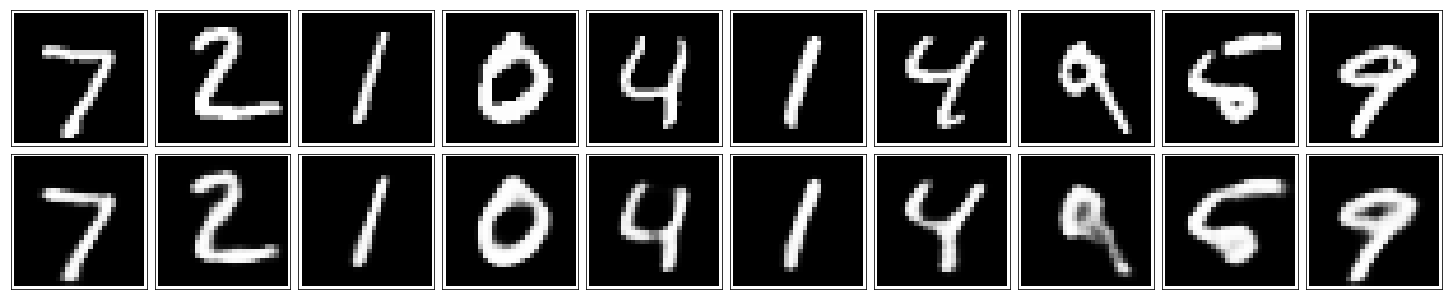

In [22]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed = sess.run(decoded, feed_dict={inputs_: in_imgs.reshape((10, 28, 28, 1))})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)


fig.tight_layout(pad=0.1)

### sess.close()

## Denoising

In [27]:
learning_rate = 0.001
inputs_ = tf.placeholder(tf.float32, (None, 28, 28, 1), name='inputs')
targets_ = tf.placeholder(tf.float32, (None, 28, 28, 1), name='targets')

### Encoder
conv1 = tf.layers.conv2d(inputs_, 32, (3, 3), padding='same', activation=tf.nn.relu)
# Now 28x28x32
maxpool1 = tf.layers.max_pooling2d(conv1, (2, 2), (2, 2), padding='same')
# Now 14x14x32
conv2 = tf.layers.conv2d(maxpool1, 32, (3, 3), padding='same', activation=tf.nn.relu)
# Now 14x14x32
maxpool2 = tf.layers.max_pooling2d(conv2, (2, 2), (2, 2), padding='same')
# Now 7x7x32
conv3 = tf.layers.conv2d(maxpool2, 16, (3, 3), padding='same', activation=tf.nn.relu)
# Now 7x7x16
encoded = tf.layers.max_pooling2d(conv3, (2, 2), (2, 2), padding='same')
# Now 4x4x16

### Decoder
upsample1 = tf.image.resize_nearest_neighbor(encoded, (7, 7))
# Now 7x7x16
conv4 = tf.layers.conv2d(upsample1, 16, (3, 3), padding='same', activation=tf.nn.relu)
# Now 7x7x16
upsample2 = tf.image.resize_nearest_neighbor(conv4, (14, 14))
# Now 14x14x32
conv5 = tf.layers.conv2d(upsample2, 32, (3, 3), padding='same', activation=tf.nn.relu)
# Now 14x14x32
upsample3 = tf.image.resize_nearest_neighbor(conv4, (28, 28))
# Now 28x28x32
conv6 = tf.layers.conv2d(upsample3, 32, (3, 3), padding='same', activation=tf.nn.relu)
# Now 28x28x32

logits = tf.layers.conv2d(conv6, 1, (3, 3), padding='same', activation=None)
#Now 28x28x1

# Pass logits through sigmoid to get reconstructed image
decoded = tf.nn.sigmoid(logits)

# Pass logits through sigmoid and calculate the cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)

# Get cost and define the optimizer
cost = tf.reduce_mean(loss)
opt = tf.train.AdamOptimizer(learning_rate).minimize(cost)

In [28]:
sess = tf.Session()

In [29]:
epochs = 100
batch_size = 200
# Set's how much noise we're adding to the MNIST images
noise_factor = 0.5
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        # Get images from the batch
        imgs = batch[0].reshape((-1, 28, 28, 1))
        
        # Add random noise to the input images
        noisy_imgs = imgs + noise_factor * np.random.randn(*imgs.shape)
        # Clip the images to be between 0 and 1
        noisy_imgs = np.clip(noisy_imgs, 0., 1.)
        
        # Noisy images as inputs, original images as targets
        batch_cost, _ = sess.run([cost, opt], feed_dict={inputs_: noisy_imgs,
                                                         targets_: imgs})

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/100... Training loss: 0.7055
Epoch: 1/100... Training loss: 0.6769
Epoch: 1/100... Training loss: 0.6530
Epoch: 1/100... Training loss: 0.6273
Epoch: 1/100... Training loss: 0.5919
Epoch: 1/100... Training loss: 0.5557
Epoch: 1/100... Training loss: 0.5134
Epoch: 1/100... Training loss: 0.4856
Epoch: 1/100... Training loss: 0.4802
Epoch: 1/100... Training loss: 0.5064
Epoch: 1/100... Training loss: 0.5101
Epoch: 1/100... Training loss: 0.5113
Epoch: 1/100... Training loss: 0.4830
Epoch: 1/100... Training loss: 0.4667
Epoch: 1/100... Training loss: 0.4508
Epoch: 1/100... Training loss: 0.4489
Epoch: 1/100... Training loss: 0.4502
Epoch: 1/100... Training loss: 0.4473
Epoch: 1/100... Training loss: 0.4382
Epoch: 1/100... Training loss: 0.4383
Epoch: 1/100... Training loss: 0.4221
Epoch: 1/100... Training loss: 0.4190
Epoch: 1/100... Training loss: 0.4180
Epoch: 1/100... Training loss: 0.3970
Epoch: 1/100... Training loss: 0.3907
Epoch: 1/100... Training loss: 0.3831
Epoch: 1/100

Epoch: 1/100... Training loss: 0.1824
Epoch: 1/100... Training loss: 0.1860
Epoch: 1/100... Training loss: 0.1848
Epoch: 1/100... Training loss: 0.1812
Epoch: 1/100... Training loss: 0.1786
Epoch: 1/100... Training loss: 0.1787
Epoch: 1/100... Training loss: 0.1833
Epoch: 1/100... Training loss: 0.1798
Epoch: 1/100... Training loss: 0.1839
Epoch: 1/100... Training loss: 0.1823
Epoch: 1/100... Training loss: 0.1824
Epoch: 1/100... Training loss: 0.1796
Epoch: 1/100... Training loss: 0.1747
Epoch: 1/100... Training loss: 0.1812
Epoch: 1/100... Training loss: 0.1848
Epoch: 1/100... Training loss: 0.1887
Epoch: 1/100... Training loss: 0.1851
Epoch: 1/100... Training loss: 0.1866
Epoch: 1/100... Training loss: 0.1806
Epoch: 1/100... Training loss: 0.1766
Epoch: 1/100... Training loss: 0.1818
Epoch: 1/100... Training loss: 0.1773
Epoch: 1/100... Training loss: 0.1780
Epoch: 1/100... Training loss: 0.1805
Epoch: 1/100... Training loss: 0.1791
Epoch: 1/100... Training loss: 0.1792
Epoch: 1/100

Epoch: 2/100... Training loss: 0.1612
Epoch: 2/100... Training loss: 0.1590
Epoch: 2/100... Training loss: 0.1561
Epoch: 2/100... Training loss: 0.1627
Epoch: 2/100... Training loss: 0.1599
Epoch: 2/100... Training loss: 0.1544
Epoch: 2/100... Training loss: 0.1585
Epoch: 2/100... Training loss: 0.1594
Epoch: 2/100... Training loss: 0.1606
Epoch: 2/100... Training loss: 0.1620
Epoch: 2/100... Training loss: 0.1558
Epoch: 2/100... Training loss: 0.1562
Epoch: 2/100... Training loss: 0.1623
Epoch: 2/100... Training loss: 0.1585
Epoch: 2/100... Training loss: 0.1664
Epoch: 2/100... Training loss: 0.1633
Epoch: 2/100... Training loss: 0.1634
Epoch: 2/100... Training loss: 0.1607
Epoch: 2/100... Training loss: 0.1582
Epoch: 2/100... Training loss: 0.1664
Epoch: 2/100... Training loss: 0.1615
Epoch: 2/100... Training loss: 0.1602
Epoch: 2/100... Training loss: 0.1576
Epoch: 2/100... Training loss: 0.1610
Epoch: 2/100... Training loss: 0.1545
Epoch: 2/100... Training loss: 0.1635
Epoch: 2/100

Epoch: 3/100... Training loss: 0.1518
Epoch: 3/100... Training loss: 0.1549
Epoch: 3/100... Training loss: 0.1487
Epoch: 3/100... Training loss: 0.1485
Epoch: 3/100... Training loss: 0.1479
Epoch: 3/100... Training loss: 0.1512
Epoch: 3/100... Training loss: 0.1513
Epoch: 3/100... Training loss: 0.1528
Epoch: 3/100... Training loss: 0.1511
Epoch: 3/100... Training loss: 0.1484
Epoch: 3/100... Training loss: 0.1507
Epoch: 3/100... Training loss: 0.1533
Epoch: 3/100... Training loss: 0.1498
Epoch: 3/100... Training loss: 0.1553
Epoch: 3/100... Training loss: 0.1480
Epoch: 3/100... Training loss: 0.1495
Epoch: 3/100... Training loss: 0.1502
Epoch: 3/100... Training loss: 0.1479
Epoch: 3/100... Training loss: 0.1553
Epoch: 3/100... Training loss: 0.1477
Epoch: 3/100... Training loss: 0.1539
Epoch: 3/100... Training loss: 0.1510
Epoch: 3/100... Training loss: 0.1622
Epoch: 3/100... Training loss: 0.1495
Epoch: 3/100... Training loss: 0.1523
Epoch: 3/100... Training loss: 0.1518
Epoch: 3/100

Epoch: 3/100... Training loss: 0.1497
Epoch: 3/100... Training loss: 0.1477
Epoch: 3/100... Training loss: 0.1456
Epoch: 3/100... Training loss: 0.1418
Epoch: 3/100... Training loss: 0.1437
Epoch: 3/100... Training loss: 0.1455
Epoch: 3/100... Training loss: 0.1397
Epoch: 3/100... Training loss: 0.1472
Epoch: 3/100... Training loss: 0.1467
Epoch: 3/100... Training loss: 0.1448
Epoch: 3/100... Training loss: 0.1443
Epoch: 3/100... Training loss: 0.1409
Epoch: 3/100... Training loss: 0.1429
Epoch: 3/100... Training loss: 0.1435
Epoch: 3/100... Training loss: 0.1414
Epoch: 3/100... Training loss: 0.1474
Epoch: 3/100... Training loss: 0.1442
Epoch: 3/100... Training loss: 0.1385
Epoch: 3/100... Training loss: 0.1410
Epoch: 3/100... Training loss: 0.1409
Epoch: 3/100... Training loss: 0.1390
Epoch: 3/100... Training loss: 0.1486
Epoch: 3/100... Training loss: 0.1461
Epoch: 3/100... Training loss: 0.1432
Epoch: 3/100... Training loss: 0.1464
Epoch: 3/100... Training loss: 0.1397
Epoch: 3/100

Epoch: 4/100... Training loss: 0.1385
Epoch: 4/100... Training loss: 0.1328
Epoch: 4/100... Training loss: 0.1395
Epoch: 4/100... Training loss: 0.1404
Epoch: 4/100... Training loss: 0.1370
Epoch: 4/100... Training loss: 0.1417
Epoch: 4/100... Training loss: 0.1394
Epoch: 4/100... Training loss: 0.1411
Epoch: 4/100... Training loss: 0.1351
Epoch: 4/100... Training loss: 0.1410
Epoch: 4/100... Training loss: 0.1435
Epoch: 4/100... Training loss: 0.1393
Epoch: 4/100... Training loss: 0.1379
Epoch: 4/100... Training loss: 0.1382
Epoch: 4/100... Training loss: 0.1437
Epoch: 4/100... Training loss: 0.1442
Epoch: 4/100... Training loss: 0.1448
Epoch: 4/100... Training loss: 0.1413
Epoch: 4/100... Training loss: 0.1376
Epoch: 4/100... Training loss: 0.1374
Epoch: 4/100... Training loss: 0.1387
Epoch: 4/100... Training loss: 0.1344
Epoch: 4/100... Training loss: 0.1384
Epoch: 4/100... Training loss: 0.1420
Epoch: 4/100... Training loss: 0.1381
Epoch: 4/100... Training loss: 0.1352
Epoch: 4/100

Epoch: 5/100... Training loss: 0.1372
Epoch: 5/100... Training loss: 0.1337
Epoch: 5/100... Training loss: 0.1340
Epoch: 5/100... Training loss: 0.1336
Epoch: 5/100... Training loss: 0.1387
Epoch: 5/100... Training loss: 0.1343
Epoch: 5/100... Training loss: 0.1342
Epoch: 5/100... Training loss: 0.1305
Epoch: 5/100... Training loss: 0.1333
Epoch: 5/100... Training loss: 0.1334
Epoch: 5/100... Training loss: 0.1359
Epoch: 5/100... Training loss: 0.1329
Epoch: 5/100... Training loss: 0.1339
Epoch: 5/100... Training loss: 0.1356
Epoch: 5/100... Training loss: 0.1345
Epoch: 5/100... Training loss: 0.1337
Epoch: 5/100... Training loss: 0.1386
Epoch: 5/100... Training loss: 0.1361
Epoch: 5/100... Training loss: 0.1392
Epoch: 5/100... Training loss: 0.1360
Epoch: 5/100... Training loss: 0.1318
Epoch: 5/100... Training loss: 0.1330
Epoch: 5/100... Training loss: 0.1306
Epoch: 5/100... Training loss: 0.1324
Epoch: 5/100... Training loss: 0.1324
Epoch: 5/100... Training loss: 0.1349
Epoch: 5/100

Epoch: 6/100... Training loss: 0.1354
Epoch: 6/100... Training loss: 0.1327
Epoch: 6/100... Training loss: 0.1284
Epoch: 6/100... Training loss: 0.1270
Epoch: 6/100... Training loss: 0.1317
Epoch: 6/100... Training loss: 0.1322
Epoch: 6/100... Training loss: 0.1322
Epoch: 6/100... Training loss: 0.1378
Epoch: 6/100... Training loss: 0.1372
Epoch: 6/100... Training loss: 0.1302
Epoch: 6/100... Training loss: 0.1291
Epoch: 6/100... Training loss: 0.1279
Epoch: 6/100... Training loss: 0.1318
Epoch: 6/100... Training loss: 0.1293
Epoch: 6/100... Training loss: 0.1298
Epoch: 6/100... Training loss: 0.1357
Epoch: 6/100... Training loss: 0.1354
Epoch: 6/100... Training loss: 0.1329
Epoch: 6/100... Training loss: 0.1302
Epoch: 6/100... Training loss: 0.1388
Epoch: 6/100... Training loss: 0.1333
Epoch: 6/100... Training loss: 0.1304
Epoch: 6/100... Training loss: 0.1312
Epoch: 6/100... Training loss: 0.1328
Epoch: 6/100... Training loss: 0.1321
Epoch: 6/100... Training loss: 0.1273
Epoch: 6/100

Epoch: 6/100... Training loss: 0.1290
Epoch: 6/100... Training loss: 0.1275
Epoch: 6/100... Training loss: 0.1323
Epoch: 6/100... Training loss: 0.1285
Epoch: 6/100... Training loss: 0.1292
Epoch: 6/100... Training loss: 0.1270
Epoch: 6/100... Training loss: 0.1297
Epoch: 6/100... Training loss: 0.1293
Epoch: 6/100... Training loss: 0.1265
Epoch: 6/100... Training loss: 0.1289
Epoch: 6/100... Training loss: 0.1291
Epoch: 6/100... Training loss: 0.1306
Epoch: 6/100... Training loss: 0.1282
Epoch: 6/100... Training loss: 0.1266
Epoch: 6/100... Training loss: 0.1301
Epoch: 6/100... Training loss: 0.1229
Epoch: 6/100... Training loss: 0.1255
Epoch: 6/100... Training loss: 0.1247
Epoch: 6/100... Training loss: 0.1258
Epoch: 6/100... Training loss: 0.1309
Epoch: 6/100... Training loss: 0.1301
Epoch: 6/100... Training loss: 0.1324
Epoch: 6/100... Training loss: 0.1297
Epoch: 6/100... Training loss: 0.1259
Epoch: 6/100... Training loss: 0.1306
Epoch: 6/100... Training loss: 0.1324
Epoch: 6/100

Epoch: 7/100... Training loss: 0.1253
Epoch: 7/100... Training loss: 0.1272
Epoch: 7/100... Training loss: 0.1290
Epoch: 7/100... Training loss: 0.1293
Epoch: 7/100... Training loss: 0.1284
Epoch: 7/100... Training loss: 0.1242
Epoch: 7/100... Training loss: 0.1264
Epoch: 7/100... Training loss: 0.1237
Epoch: 7/100... Training loss: 0.1220
Epoch: 7/100... Training loss: 0.1251
Epoch: 7/100... Training loss: 0.1240
Epoch: 7/100... Training loss: 0.1259
Epoch: 7/100... Training loss: 0.1230
Epoch: 7/100... Training loss: 0.1242
Epoch: 7/100... Training loss: 0.1266
Epoch: 7/100... Training loss: 0.1256
Epoch: 7/100... Training loss: 0.1308
Epoch: 7/100... Training loss: 0.1283
Epoch: 7/100... Training loss: 0.1241
Epoch: 7/100... Training loss: 0.1269
Epoch: 7/100... Training loss: 0.1297
Epoch: 7/100... Training loss: 0.1261
Epoch: 7/100... Training loss: 0.1225
Epoch: 7/100... Training loss: 0.1303
Epoch: 7/100... Training loss: 0.1314
Epoch: 7/100... Training loss: 0.1306
Epoch: 7/100

Epoch: 8/100... Training loss: 0.1253
Epoch: 8/100... Training loss: 0.1268
Epoch: 8/100... Training loss: 0.1273
Epoch: 8/100... Training loss: 0.1182
Epoch: 8/100... Training loss: 0.1259
Epoch: 8/100... Training loss: 0.1248
Epoch: 8/100... Training loss: 0.1228
Epoch: 8/100... Training loss: 0.1233
Epoch: 8/100... Training loss: 0.1244
Epoch: 8/100... Training loss: 0.1263
Epoch: 8/100... Training loss: 0.1215
Epoch: 8/100... Training loss: 0.1233
Epoch: 8/100... Training loss: 0.1266
Epoch: 8/100... Training loss: 0.1261
Epoch: 8/100... Training loss: 0.1258
Epoch: 8/100... Training loss: 0.1277
Epoch: 8/100... Training loss: 0.1244
Epoch: 8/100... Training loss: 0.1242
Epoch: 8/100... Training loss: 0.1288
Epoch: 8/100... Training loss: 0.1225
Epoch: 8/100... Training loss: 0.1269
Epoch: 8/100... Training loss: 0.1220
Epoch: 8/100... Training loss: 0.1227
Epoch: 8/100... Training loss: 0.1267
Epoch: 8/100... Training loss: 0.1246
Epoch: 8/100... Training loss: 0.1292
Epoch: 8/100

Epoch: 8/100... Training loss: 0.1258
Epoch: 8/100... Training loss: 0.1293
Epoch: 8/100... Training loss: 0.1270
Epoch: 8/100... Training loss: 0.1235
Epoch: 8/100... Training loss: 0.1201
Epoch: 8/100... Training loss: 0.1242
Epoch: 8/100... Training loss: 0.1227
Epoch: 8/100... Training loss: 0.1244
Epoch: 8/100... Training loss: 0.1228
Epoch: 8/100... Training loss: 0.1207
Epoch: 8/100... Training loss: 0.1256
Epoch: 8/100... Training loss: 0.1207
Epoch: 8/100... Training loss: 0.1218
Epoch: 8/100... Training loss: 0.1228
Epoch: 8/100... Training loss: 0.1221
Epoch: 8/100... Training loss: 0.1228
Epoch: 8/100... Training loss: 0.1205
Epoch: 8/100... Training loss: 0.1268
Epoch: 8/100... Training loss: 0.1272
Epoch: 8/100... Training loss: 0.1254
Epoch: 8/100... Training loss: 0.1226
Epoch: 8/100... Training loss: 0.1220
Epoch: 8/100... Training loss: 0.1251
Epoch: 8/100... Training loss: 0.1198
Epoch: 9/100... Training loss: 0.1251
Epoch: 9/100... Training loss: 0.1239
Epoch: 9/100

Epoch: 9/100... Training loss: 0.1223
Epoch: 9/100... Training loss: 0.1230
Epoch: 9/100... Training loss: 0.1211
Epoch: 9/100... Training loss: 0.1213
Epoch: 9/100... Training loss: 0.1232
Epoch: 9/100... Training loss: 0.1223
Epoch: 9/100... Training loss: 0.1299
Epoch: 9/100... Training loss: 0.1224
Epoch: 9/100... Training loss: 0.1280
Epoch: 9/100... Training loss: 0.1231
Epoch: 9/100... Training loss: 0.1215
Epoch: 9/100... Training loss: 0.1217
Epoch: 9/100... Training loss: 0.1220
Epoch: 9/100... Training loss: 0.1213
Epoch: 9/100... Training loss: 0.1254
Epoch: 9/100... Training loss: 0.1232
Epoch: 9/100... Training loss: 0.1228
Epoch: 9/100... Training loss: 0.1189
Epoch: 9/100... Training loss: 0.1228
Epoch: 9/100... Training loss: 0.1204
Epoch: 9/100... Training loss: 0.1209
Epoch: 9/100... Training loss: 0.1219
Epoch: 9/100... Training loss: 0.1205
Epoch: 9/100... Training loss: 0.1237
Epoch: 9/100... Training loss: 0.1231
Epoch: 9/100... Training loss: 0.1241
Epoch: 9/100

Epoch: 10/100... Training loss: 0.1191
Epoch: 10/100... Training loss: 0.1245
Epoch: 10/100... Training loss: 0.1240
Epoch: 10/100... Training loss: 0.1232
Epoch: 10/100... Training loss: 0.1183
Epoch: 10/100... Training loss: 0.1244
Epoch: 10/100... Training loss: 0.1240
Epoch: 10/100... Training loss: 0.1241
Epoch: 10/100... Training loss: 0.1244
Epoch: 10/100... Training loss: 0.1209
Epoch: 10/100... Training loss: 0.1217
Epoch: 10/100... Training loss: 0.1207
Epoch: 10/100... Training loss: 0.1214
Epoch: 10/100... Training loss: 0.1208
Epoch: 10/100... Training loss: 0.1185
Epoch: 10/100... Training loss: 0.1223
Epoch: 10/100... Training loss: 0.1237
Epoch: 10/100... Training loss: 0.1215
Epoch: 10/100... Training loss: 0.1245
Epoch: 10/100... Training loss: 0.1204
Epoch: 10/100... Training loss: 0.1154
Epoch: 10/100... Training loss: 0.1232
Epoch: 10/100... Training loss: 0.1191
Epoch: 10/100... Training loss: 0.1187
Epoch: 10/100... Training loss: 0.1203
Epoch: 10/100... Training

Epoch: 11/100... Training loss: 0.1203
Epoch: 11/100... Training loss: 0.1186
Epoch: 11/100... Training loss: 0.1194
Epoch: 11/100... Training loss: 0.1229
Epoch: 11/100... Training loss: 0.1228
Epoch: 11/100... Training loss: 0.1188
Epoch: 11/100... Training loss: 0.1194
Epoch: 11/100... Training loss: 0.1214
Epoch: 11/100... Training loss: 0.1215
Epoch: 11/100... Training loss: 0.1217
Epoch: 11/100... Training loss: 0.1227
Epoch: 11/100... Training loss: 0.1203
Epoch: 11/100... Training loss: 0.1205
Epoch: 11/100... Training loss: 0.1231
Epoch: 11/100... Training loss: 0.1184
Epoch: 11/100... Training loss: 0.1168
Epoch: 11/100... Training loss: 0.1190
Epoch: 11/100... Training loss: 0.1199
Epoch: 11/100... Training loss: 0.1198
Epoch: 11/100... Training loss: 0.1216
Epoch: 11/100... Training loss: 0.1190
Epoch: 11/100... Training loss: 0.1201
Epoch: 11/100... Training loss: 0.1207
Epoch: 11/100... Training loss: 0.1178
Epoch: 11/100... Training loss: 0.1236
Epoch: 11/100... Training

Epoch: 11/100... Training loss: 0.1239
Epoch: 11/100... Training loss: 0.1151
Epoch: 11/100... Training loss: 0.1236
Epoch: 11/100... Training loss: 0.1174
Epoch: 11/100... Training loss: 0.1206
Epoch: 11/100... Training loss: 0.1203
Epoch: 11/100... Training loss: 0.1208
Epoch: 11/100... Training loss: 0.1204
Epoch: 11/100... Training loss: 0.1158
Epoch: 11/100... Training loss: 0.1176
Epoch: 11/100... Training loss: 0.1191
Epoch: 11/100... Training loss: 0.1232
Epoch: 11/100... Training loss: 0.1170
Epoch: 11/100... Training loss: 0.1178
Epoch: 11/100... Training loss: 0.1216
Epoch: 11/100... Training loss: 0.1141
Epoch: 11/100... Training loss: 0.1209
Epoch: 11/100... Training loss: 0.1222
Epoch: 11/100... Training loss: 0.1200
Epoch: 11/100... Training loss: 0.1227
Epoch: 11/100... Training loss: 0.1175
Epoch: 11/100... Training loss: 0.1208
Epoch: 11/100... Training loss: 0.1193
Epoch: 11/100... Training loss: 0.1188
Epoch: 11/100... Training loss: 0.1207
Epoch: 11/100... Training

Epoch: 12/100... Training loss: 0.1169
Epoch: 12/100... Training loss: 0.1229
Epoch: 12/100... Training loss: 0.1213
Epoch: 12/100... Training loss: 0.1214
Epoch: 12/100... Training loss: 0.1199
Epoch: 12/100... Training loss: 0.1206
Epoch: 12/100... Training loss: 0.1161
Epoch: 12/100... Training loss: 0.1188
Epoch: 12/100... Training loss: 0.1207
Epoch: 12/100... Training loss: 0.1166
Epoch: 12/100... Training loss: 0.1185
Epoch: 12/100... Training loss: 0.1183
Epoch: 12/100... Training loss: 0.1182
Epoch: 12/100... Training loss: 0.1236
Epoch: 12/100... Training loss: 0.1146
Epoch: 12/100... Training loss: 0.1226
Epoch: 12/100... Training loss: 0.1167
Epoch: 12/100... Training loss: 0.1180
Epoch: 12/100... Training loss: 0.1203
Epoch: 12/100... Training loss: 0.1145
Epoch: 12/100... Training loss: 0.1183
Epoch: 12/100... Training loss: 0.1156
Epoch: 12/100... Training loss: 0.1182
Epoch: 12/100... Training loss: 0.1180
Epoch: 12/100... Training loss: 0.1219
Epoch: 12/100... Training

Epoch: 13/100... Training loss: 0.1196
Epoch: 13/100... Training loss: 0.1134
Epoch: 13/100... Training loss: 0.1190
Epoch: 13/100... Training loss: 0.1221
Epoch: 13/100... Training loss: 0.1142
Epoch: 13/100... Training loss: 0.1202
Epoch: 13/100... Training loss: 0.1180
Epoch: 13/100... Training loss: 0.1181
Epoch: 13/100... Training loss: 0.1209
Epoch: 13/100... Training loss: 0.1154
Epoch: 13/100... Training loss: 0.1150
Epoch: 13/100... Training loss: 0.1177
Epoch: 13/100... Training loss: 0.1154
Epoch: 13/100... Training loss: 0.1168
Epoch: 13/100... Training loss: 0.1228
Epoch: 13/100... Training loss: 0.1195
Epoch: 13/100... Training loss: 0.1214
Epoch: 13/100... Training loss: 0.1147
Epoch: 13/100... Training loss: 0.1209
Epoch: 13/100... Training loss: 0.1180
Epoch: 13/100... Training loss: 0.1161
Epoch: 13/100... Training loss: 0.1199
Epoch: 13/100... Training loss: 0.1179
Epoch: 13/100... Training loss: 0.1137
Epoch: 13/100... Training loss: 0.1159
Epoch: 13/100... Training

Epoch: 13/100... Training loss: 0.1114
Epoch: 13/100... Training loss: 0.1191
Epoch: 13/100... Training loss: 0.1179
Epoch: 13/100... Training loss: 0.1153
Epoch: 13/100... Training loss: 0.1198
Epoch: 13/100... Training loss: 0.1158
Epoch: 13/100... Training loss: 0.1188
Epoch: 13/100... Training loss: 0.1160
Epoch: 13/100... Training loss: 0.1202
Epoch: 13/100... Training loss: 0.1160
Epoch: 13/100... Training loss: 0.1167
Epoch: 13/100... Training loss: 0.1184
Epoch: 13/100... Training loss: 0.1209
Epoch: 13/100... Training loss: 0.1166
Epoch: 13/100... Training loss: 0.1121
Epoch: 13/100... Training loss: 0.1128
Epoch: 13/100... Training loss: 0.1180
Epoch: 13/100... Training loss: 0.1172
Epoch: 13/100... Training loss: 0.1180
Epoch: 13/100... Training loss: 0.1210
Epoch: 13/100... Training loss: 0.1216
Epoch: 13/100... Training loss: 0.1169
Epoch: 13/100... Training loss: 0.1188
Epoch: 13/100... Training loss: 0.1176
Epoch: 13/100... Training loss: 0.1186
Epoch: 13/100... Training

Epoch: 14/100... Training loss: 0.1166
Epoch: 14/100... Training loss: 0.1145
Epoch: 14/100... Training loss: 0.1159
Epoch: 14/100... Training loss: 0.1172
Epoch: 14/100... Training loss: 0.1188
Epoch: 14/100... Training loss: 0.1178
Epoch: 14/100... Training loss: 0.1180
Epoch: 14/100... Training loss: 0.1165
Epoch: 14/100... Training loss: 0.1149
Epoch: 14/100... Training loss: 0.1168
Epoch: 14/100... Training loss: 0.1188
Epoch: 14/100... Training loss: 0.1232
Epoch: 14/100... Training loss: 0.1204
Epoch: 14/100... Training loss: 0.1178
Epoch: 14/100... Training loss: 0.1195
Epoch: 14/100... Training loss: 0.1141
Epoch: 14/100... Training loss: 0.1167
Epoch: 14/100... Training loss: 0.1188
Epoch: 14/100... Training loss: 0.1147
Epoch: 14/100... Training loss: 0.1187
Epoch: 14/100... Training loss: 0.1155
Epoch: 14/100... Training loss: 0.1151
Epoch: 14/100... Training loss: 0.1158
Epoch: 14/100... Training loss: 0.1186
Epoch: 14/100... Training loss: 0.1169
Epoch: 14/100... Training

Epoch: 15/100... Training loss: 0.1143
Epoch: 15/100... Training loss: 0.1123
Epoch: 15/100... Training loss: 0.1207
Epoch: 15/100... Training loss: 0.1095
Epoch: 15/100... Training loss: 0.1170
Epoch: 15/100... Training loss: 0.1165
Epoch: 15/100... Training loss: 0.1151
Epoch: 15/100... Training loss: 0.1172
Epoch: 15/100... Training loss: 0.1138
Epoch: 15/100... Training loss: 0.1192
Epoch: 15/100... Training loss: 0.1147
Epoch: 15/100... Training loss: 0.1188
Epoch: 15/100... Training loss: 0.1200
Epoch: 15/100... Training loss: 0.1149
Epoch: 15/100... Training loss: 0.1147
Epoch: 15/100... Training loss: 0.1118
Epoch: 15/100... Training loss: 0.1197
Epoch: 15/100... Training loss: 0.1170
Epoch: 15/100... Training loss: 0.1185
Epoch: 15/100... Training loss: 0.1167
Epoch: 15/100... Training loss: 0.1157
Epoch: 15/100... Training loss: 0.1138
Epoch: 15/100... Training loss: 0.1175
Epoch: 15/100... Training loss: 0.1149
Epoch: 15/100... Training loss: 0.1163
Epoch: 15/100... Training

Epoch: 15/100... Training loss: 0.1188
Epoch: 15/100... Training loss: 0.1165
Epoch: 15/100... Training loss: 0.1150
Epoch: 15/100... Training loss: 0.1186
Epoch: 15/100... Training loss: 0.1147
Epoch: 15/100... Training loss: 0.1205
Epoch: 15/100... Training loss: 0.1131
Epoch: 16/100... Training loss: 0.1167
Epoch: 16/100... Training loss: 0.1159
Epoch: 16/100... Training loss: 0.1124
Epoch: 16/100... Training loss: 0.1146
Epoch: 16/100... Training loss: 0.1172
Epoch: 16/100... Training loss: 0.1183
Epoch: 16/100... Training loss: 0.1178
Epoch: 16/100... Training loss: 0.1170
Epoch: 16/100... Training loss: 0.1156
Epoch: 16/100... Training loss: 0.1133
Epoch: 16/100... Training loss: 0.1145
Epoch: 16/100... Training loss: 0.1178
Epoch: 16/100... Training loss: 0.1159
Epoch: 16/100... Training loss: 0.1129
Epoch: 16/100... Training loss: 0.1105
Epoch: 16/100... Training loss: 0.1147
Epoch: 16/100... Training loss: 0.1140
Epoch: 16/100... Training loss: 0.1167
Epoch: 16/100... Training

Epoch: 16/100... Training loss: 0.1177
Epoch: 16/100... Training loss: 0.1179
Epoch: 16/100... Training loss: 0.1165
Epoch: 16/100... Training loss: 0.1129
Epoch: 16/100... Training loss: 0.1148
Epoch: 16/100... Training loss: 0.1182
Epoch: 16/100... Training loss: 0.1150
Epoch: 16/100... Training loss: 0.1182
Epoch: 16/100... Training loss: 0.1165
Epoch: 16/100... Training loss: 0.1151
Epoch: 16/100... Training loss: 0.1182
Epoch: 16/100... Training loss: 0.1142
Epoch: 16/100... Training loss: 0.1153
Epoch: 16/100... Training loss: 0.1114
Epoch: 16/100... Training loss: 0.1178
Epoch: 16/100... Training loss: 0.1168
Epoch: 16/100... Training loss: 0.1168
Epoch: 16/100... Training loss: 0.1147
Epoch: 16/100... Training loss: 0.1164
Epoch: 16/100... Training loss: 0.1176
Epoch: 16/100... Training loss: 0.1135
Epoch: 16/100... Training loss: 0.1143
Epoch: 16/100... Training loss: 0.1163
Epoch: 16/100... Training loss: 0.1178
Epoch: 16/100... Training loss: 0.1135
Epoch: 16/100... Training

Epoch: 17/100... Training loss: 0.1133
Epoch: 17/100... Training loss: 0.1145
Epoch: 17/100... Training loss: 0.1171
Epoch: 17/100... Training loss: 0.1163
Epoch: 17/100... Training loss: 0.1119
Epoch: 17/100... Training loss: 0.1178
Epoch: 17/100... Training loss: 0.1150
Epoch: 17/100... Training loss: 0.1144
Epoch: 17/100... Training loss: 0.1152
Epoch: 17/100... Training loss: 0.1125
Epoch: 17/100... Training loss: 0.1168
Epoch: 17/100... Training loss: 0.1136
Epoch: 17/100... Training loss: 0.1138
Epoch: 17/100... Training loss: 0.1147
Epoch: 17/100... Training loss: 0.1122
Epoch: 17/100... Training loss: 0.1156
Epoch: 17/100... Training loss: 0.1178
Epoch: 17/100... Training loss: 0.1111
Epoch: 17/100... Training loss: 0.1169
Epoch: 17/100... Training loss: 0.1126
Epoch: 17/100... Training loss: 0.1195
Epoch: 17/100... Training loss: 0.1174
Epoch: 17/100... Training loss: 0.1161
Epoch: 17/100... Training loss: 0.1146
Epoch: 17/100... Training loss: 0.1116
Epoch: 17/100... Training

Epoch: 18/100... Training loss: 0.1121
Epoch: 18/100... Training loss: 0.1104
Epoch: 18/100... Training loss: 0.1158
Epoch: 18/100... Training loss: 0.1120
Epoch: 18/100... Training loss: 0.1162
Epoch: 18/100... Training loss: 0.1102
Epoch: 18/100... Training loss: 0.1185
Epoch: 18/100... Training loss: 0.1153
Epoch: 18/100... Training loss: 0.1156
Epoch: 18/100... Training loss: 0.1144
Epoch: 18/100... Training loss: 0.1162
Epoch: 18/100... Training loss: 0.1134
Epoch: 18/100... Training loss: 0.1105
Epoch: 18/100... Training loss: 0.1173
Epoch: 18/100... Training loss: 0.1129
Epoch: 18/100... Training loss: 0.1170
Epoch: 18/100... Training loss: 0.1110
Epoch: 18/100... Training loss: 0.1159
Epoch: 18/100... Training loss: 0.1129
Epoch: 18/100... Training loss: 0.1143
Epoch: 18/100... Training loss: 0.1112
Epoch: 18/100... Training loss: 0.1102
Epoch: 18/100... Training loss: 0.1104
Epoch: 18/100... Training loss: 0.1147
Epoch: 18/100... Training loss: 0.1183
Epoch: 18/100... Training

Epoch: 18/100... Training loss: 0.1143
Epoch: 18/100... Training loss: 0.1138
Epoch: 18/100... Training loss: 0.1151
Epoch: 18/100... Training loss: 0.1133
Epoch: 18/100... Training loss: 0.1116
Epoch: 18/100... Training loss: 0.1145
Epoch: 18/100... Training loss: 0.1122
Epoch: 18/100... Training loss: 0.1182
Epoch: 18/100... Training loss: 0.1129
Epoch: 18/100... Training loss: 0.1127
Epoch: 18/100... Training loss: 0.1132
Epoch: 18/100... Training loss: 0.1157
Epoch: 18/100... Training loss: 0.1124
Epoch: 18/100... Training loss: 0.1158
Epoch: 18/100... Training loss: 0.1130
Epoch: 18/100... Training loss: 0.1137
Epoch: 18/100... Training loss: 0.1156
Epoch: 18/100... Training loss: 0.1145
Epoch: 18/100... Training loss: 0.1140
Epoch: 18/100... Training loss: 0.1131
Epoch: 18/100... Training loss: 0.1163
Epoch: 18/100... Training loss: 0.1139
Epoch: 18/100... Training loss: 0.1104
Epoch: 18/100... Training loss: 0.1126
Epoch: 18/100... Training loss: 0.1172
Epoch: 18/100... Training

Epoch: 19/100... Training loss: 0.1171
Epoch: 19/100... Training loss: 0.1152
Epoch: 19/100... Training loss: 0.1120
Epoch: 19/100... Training loss: 0.1158
Epoch: 19/100... Training loss: 0.1142
Epoch: 19/100... Training loss: 0.1108
Epoch: 19/100... Training loss: 0.1149
Epoch: 19/100... Training loss: 0.1126
Epoch: 19/100... Training loss: 0.1121
Epoch: 19/100... Training loss: 0.1107
Epoch: 19/100... Training loss: 0.1124
Epoch: 19/100... Training loss: 0.1148
Epoch: 19/100... Training loss: 0.1137
Epoch: 19/100... Training loss: 0.1137
Epoch: 19/100... Training loss: 0.1125
Epoch: 19/100... Training loss: 0.1142
Epoch: 19/100... Training loss: 0.1145
Epoch: 19/100... Training loss: 0.1133
Epoch: 19/100... Training loss: 0.1120
Epoch: 19/100... Training loss: 0.1112
Epoch: 19/100... Training loss: 0.1127
Epoch: 19/100... Training loss: 0.1172
Epoch: 19/100... Training loss: 0.1129
Epoch: 19/100... Training loss: 0.1097
Epoch: 19/100... Training loss: 0.1146
Epoch: 19/100... Training

Epoch: 20/100... Training loss: 0.1136
Epoch: 20/100... Training loss: 0.1156
Epoch: 20/100... Training loss: 0.1143
Epoch: 20/100... Training loss: 0.1130
Epoch: 20/100... Training loss: 0.1110
Epoch: 20/100... Training loss: 0.1127
Epoch: 20/100... Training loss: 0.1148
Epoch: 20/100... Training loss: 0.1131
Epoch: 20/100... Training loss: 0.1092
Epoch: 20/100... Training loss: 0.1151
Epoch: 20/100... Training loss: 0.1153
Epoch: 20/100... Training loss: 0.1144
Epoch: 20/100... Training loss: 0.1141
Epoch: 20/100... Training loss: 0.1138
Epoch: 20/100... Training loss: 0.1129
Epoch: 20/100... Training loss: 0.1141
Epoch: 20/100... Training loss: 0.1123
Epoch: 20/100... Training loss: 0.1137
Epoch: 20/100... Training loss: 0.1153
Epoch: 20/100... Training loss: 0.1113
Epoch: 20/100... Training loss: 0.1101
Epoch: 20/100... Training loss: 0.1127
Epoch: 20/100... Training loss: 0.1130
Epoch: 20/100... Training loss: 0.1152
Epoch: 20/100... Training loss: 0.1149
Epoch: 20/100... Training

Epoch: 20/100... Training loss: 0.1100
Epoch: 20/100... Training loss: 0.1122
Epoch: 20/100... Training loss: 0.1113
Epoch: 20/100... Training loss: 0.1155
Epoch: 20/100... Training loss: 0.1095
Epoch: 20/100... Training loss: 0.1176
Epoch: 20/100... Training loss: 0.1113
Epoch: 20/100... Training loss: 0.1108
Epoch: 20/100... Training loss: 0.1107
Epoch: 20/100... Training loss: 0.1112
Epoch: 20/100... Training loss: 0.1091
Epoch: 20/100... Training loss: 0.1115
Epoch: 20/100... Training loss: 0.1170
Epoch: 20/100... Training loss: 0.1152
Epoch: 20/100... Training loss: 0.1107
Epoch: 20/100... Training loss: 0.1120
Epoch: 20/100... Training loss: 0.1125
Epoch: 20/100... Training loss: 0.1116
Epoch: 20/100... Training loss: 0.1117
Epoch: 20/100... Training loss: 0.1128
Epoch: 20/100... Training loss: 0.1144
Epoch: 20/100... Training loss: 0.1101
Epoch: 20/100... Training loss: 0.1125
Epoch: 20/100... Training loss: 0.1174
Epoch: 20/100... Training loss: 0.1077
Epoch: 20/100... Training

Epoch: 21/100... Training loss: 0.1141
Epoch: 21/100... Training loss: 0.1102
Epoch: 21/100... Training loss: 0.1134
Epoch: 21/100... Training loss: 0.1139
Epoch: 21/100... Training loss: 0.1129
Epoch: 21/100... Training loss: 0.1151
Epoch: 21/100... Training loss: 0.1087
Epoch: 21/100... Training loss: 0.1107
Epoch: 21/100... Training loss: 0.1085
Epoch: 21/100... Training loss: 0.1114
Epoch: 21/100... Training loss: 0.1113
Epoch: 21/100... Training loss: 0.1144
Epoch: 21/100... Training loss: 0.1134
Epoch: 21/100... Training loss: 0.1102
Epoch: 21/100... Training loss: 0.1122
Epoch: 21/100... Training loss: 0.1121
Epoch: 21/100... Training loss: 0.1109
Epoch: 21/100... Training loss: 0.1163
Epoch: 21/100... Training loss: 0.1115
Epoch: 21/100... Training loss: 0.1101
Epoch: 21/100... Training loss: 0.1093
Epoch: 21/100... Training loss: 0.1103
Epoch: 21/100... Training loss: 0.1148
Epoch: 21/100... Training loss: 0.1116
Epoch: 21/100... Training loss: 0.1115
Epoch: 21/100... Training

Epoch: 22/100... Training loss: 0.1151
Epoch: 22/100... Training loss: 0.1164
Epoch: 22/100... Training loss: 0.1141
Epoch: 22/100... Training loss: 0.1127
Epoch: 22/100... Training loss: 0.1126
Epoch: 22/100... Training loss: 0.1080
Epoch: 22/100... Training loss: 0.1136
Epoch: 22/100... Training loss: 0.1118
Epoch: 22/100... Training loss: 0.1107
Epoch: 22/100... Training loss: 0.1147
Epoch: 22/100... Training loss: 0.1162
Epoch: 22/100... Training loss: 0.1102
Epoch: 22/100... Training loss: 0.1141
Epoch: 22/100... Training loss: 0.1106
Epoch: 22/100... Training loss: 0.1126
Epoch: 22/100... Training loss: 0.1101
Epoch: 22/100... Training loss: 0.1152
Epoch: 22/100... Training loss: 0.1118
Epoch: 22/100... Training loss: 0.1136
Epoch: 22/100... Training loss: 0.1133
Epoch: 22/100... Training loss: 0.1108
Epoch: 22/100... Training loss: 0.1149
Epoch: 22/100... Training loss: 0.1140
Epoch: 22/100... Training loss: 0.1124
Epoch: 22/100... Training loss: 0.1143
Epoch: 22/100... Training

Epoch: 23/100... Training loss: 0.1130
Epoch: 23/100... Training loss: 0.1128
Epoch: 23/100... Training loss: 0.1121
Epoch: 23/100... Training loss: 0.1100
Epoch: 23/100... Training loss: 0.1117
Epoch: 23/100... Training loss: 0.1139
Epoch: 23/100... Training loss: 0.1106
Epoch: 23/100... Training loss: 0.1148
Epoch: 23/100... Training loss: 0.1104
Epoch: 23/100... Training loss: 0.1094
Epoch: 23/100... Training loss: 0.1124
Epoch: 23/100... Training loss: 0.1085
Epoch: 23/100... Training loss: 0.1111
Epoch: 23/100... Training loss: 0.1123
Epoch: 23/100... Training loss: 0.1097
Epoch: 23/100... Training loss: 0.1144
Epoch: 23/100... Training loss: 0.1114
Epoch: 23/100... Training loss: 0.1165
Epoch: 23/100... Training loss: 0.1101
Epoch: 23/100... Training loss: 0.1095
Epoch: 23/100... Training loss: 0.1142
Epoch: 23/100... Training loss: 0.1118
Epoch: 23/100... Training loss: 0.1146
Epoch: 23/100... Training loss: 0.1126
Epoch: 23/100... Training loss: 0.1093
Epoch: 23/100... Training

Epoch: 23/100... Training loss: 0.1115
Epoch: 23/100... Training loss: 0.1128
Epoch: 23/100... Training loss: 0.1100
Epoch: 23/100... Training loss: 0.1101
Epoch: 23/100... Training loss: 0.1124
Epoch: 23/100... Training loss: 0.1115
Epoch: 23/100... Training loss: 0.1119
Epoch: 23/100... Training loss: 0.1118
Epoch: 23/100... Training loss: 0.1112
Epoch: 23/100... Training loss: 0.1099
Epoch: 23/100... Training loss: 0.1115
Epoch: 23/100... Training loss: 0.1135
Epoch: 23/100... Training loss: 0.1127
Epoch: 23/100... Training loss: 0.1112
Epoch: 23/100... Training loss: 0.1130
Epoch: 23/100... Training loss: 0.1120
Epoch: 23/100... Training loss: 0.1097
Epoch: 23/100... Training loss: 0.1116
Epoch: 23/100... Training loss: 0.1111
Epoch: 23/100... Training loss: 0.1118
Epoch: 23/100... Training loss: 0.1156
Epoch: 23/100... Training loss: 0.1139
Epoch: 23/100... Training loss: 0.1112
Epoch: 23/100... Training loss: 0.1111
Epoch: 23/100... Training loss: 0.1128
Epoch: 23/100... Training

KeyboardInterrupt: 

## Checking out the performance

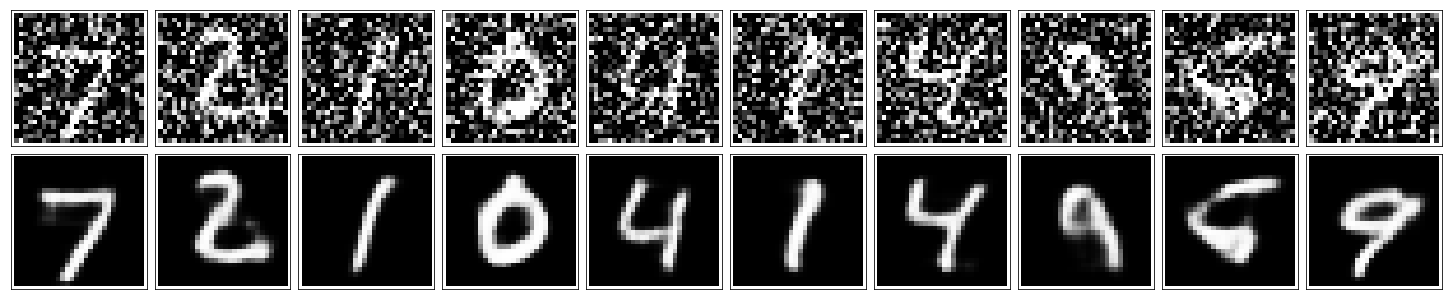

In [30]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
noisy_imgs = in_imgs + noise_factor * np.random.randn(*in_imgs.shape)
noisy_imgs = np.clip(noisy_imgs, 0., 1.)

reconstructed = sess.run(decoded, feed_dict={inputs_: noisy_imgs.reshape((10, 28, 28, 1))})

for images, row in zip([noisy_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)